In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.rcParams['figure.figsize'] = [15,8]

# 1. Đọc dữ liệu từ excel

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Practices/Datasets/DataSet_Fashion_Business.xlsx')

df.head()

,Shop,Employee,OrderDate,ItemCode,ItemName,Quantity,Price
0,CN002,27,2017-02-20 14:31:04.830,AV-CU-1090-DEN-M,AV-M-DEN-1090,1,500000
1,CN003,807,2017-02-20 19:19:38.123,AT-CU-669-XD-XXL,AT-XXL-XD-669,1,175000
2,CN002,41,2017-02-21 16:29:38.710,QT-CU-61-XAMTRANG-28,QT-28-XAMTRANG-61,1,275000
3,CN002,41,2017-02-21 16:29:38.710,AL-CU-107-DO-F,AL-F-DO-107,1,225000
4,CN002,41,2017-02-21 16:36:34.747,N-CU-324-DEN-F,N-F-DEN-324,1,95000


# 2. Lọc và loại bỏ dữ liệu không phù hợp (dữ liệu không đầy đủ hoặc có giá bán < 1000)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Shop       1048575 non-null  object        
 1   Employee   1048575 non-null  object        
 2   OrderDate  1048575 non-null  datetime64[ns]
 3   ItemCode   1048575 non-null  object        
 4   ItemName   1048575 non-null  object        
 5   Quantity   1048575 non-null  int64         
 6   Price      1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 56.0+ MB


In [7]:
df.isnull().sum()

Shop         0
Employee     0
OrderDate    0
ItemCode     0
ItemName     0
Quantity     0
Price        0
dtype: int64

In [10]:
df = df[df['Price'] >= 1000]

df.shape

(929043, 7)

In [11]:
df = df[df['Quantity'] > 0]

df.shape

(898405, 7)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,898405.0,1.020854,0.304358,1.0,1.0,1.0,1.0,108.0
Price,898405.0,300939.635877,158967.735131,2500.0,215000.0,275000.0,380000.0,1750000.0


# 3. Sử dụng biểu đồ dạng bar để hiển thị tổng doanh thu theo từng năm

In [15]:
df_doanhthu = df.groupby(df['OrderDate'].dt.year)['Price'].sum().reset_index()

df_doanhthu

,OrderDate,Price
0,2013,68458000
1,2014,145727000
2,2015,157330000
3,2016,5289580000
4,2017,30128185084
5,2018,43822052338
6,2019,54878143504
7,2020,45862643019
8,2021,36196566820
9,2022,53816987805


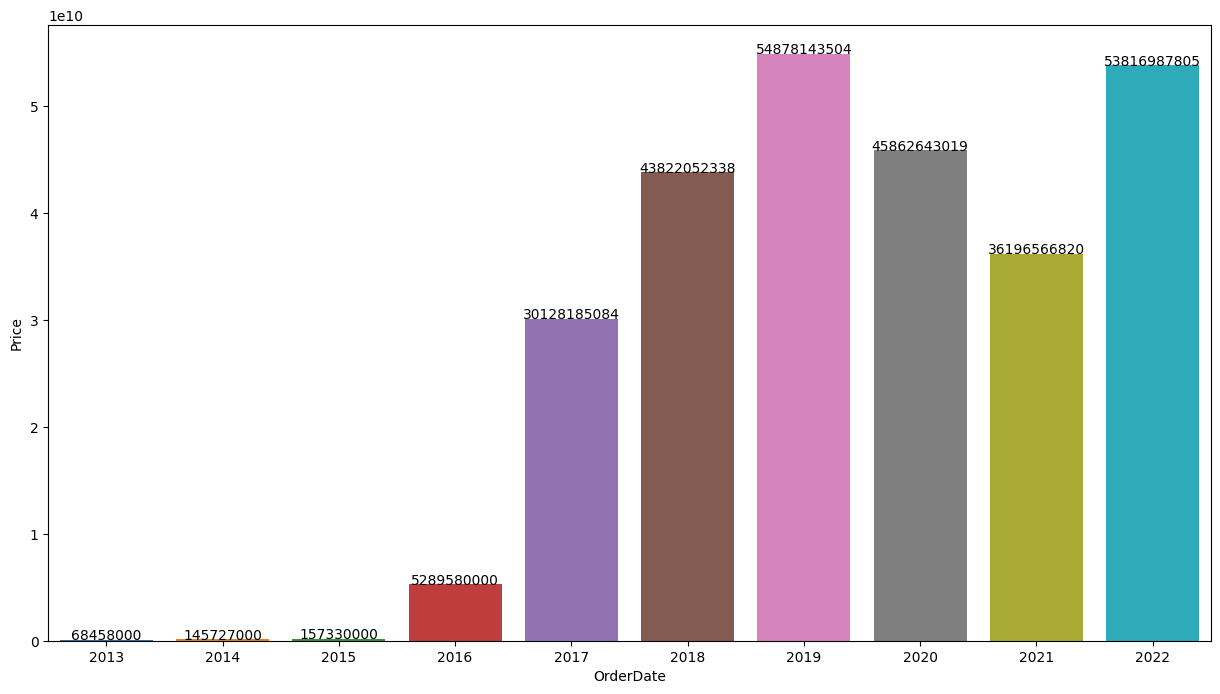

In [26]:
sns.barplot(data=df_doanhthu, x="OrderDate", y="Price")

for i, v in enumerate(df_doanhthu['Price'].sort_index()):
  plt.text(x=i, y=v + 10, s=v, ha='center')
plt.show()

# 4. Sử dụng biểu đồ dạng pie thể hiện tỉ lệ doanh thu theo năm, sử dụng lập trình để tách doanh thu của năm cao nhất trong biểu đồ

In [29]:
max_value = df_doanhthu['Price'].max()
my_explode = []
for x in df_doanhthu['Price'].sort_index():
  if x == max_value:
    my_explode.append(.3)
  else:
    my_explode.append(.1)

my_explode

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1]

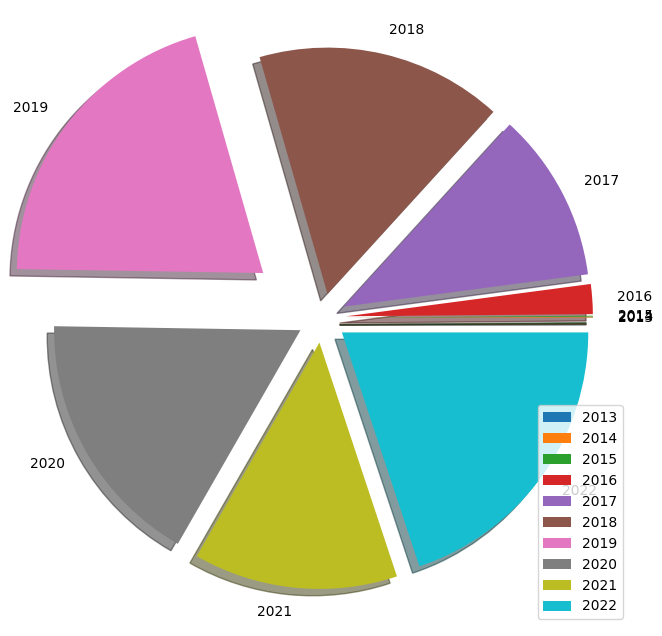

In [36]:
plt.pie(df_doanhthu['Price'], labels=df_doanhthu['OrderDate'], explode=my_explode, shadow=True)
plt.legend()
plt.show()

# 5. Sử dụng histogram thể hiện sự phân bố của giá sản phẩm

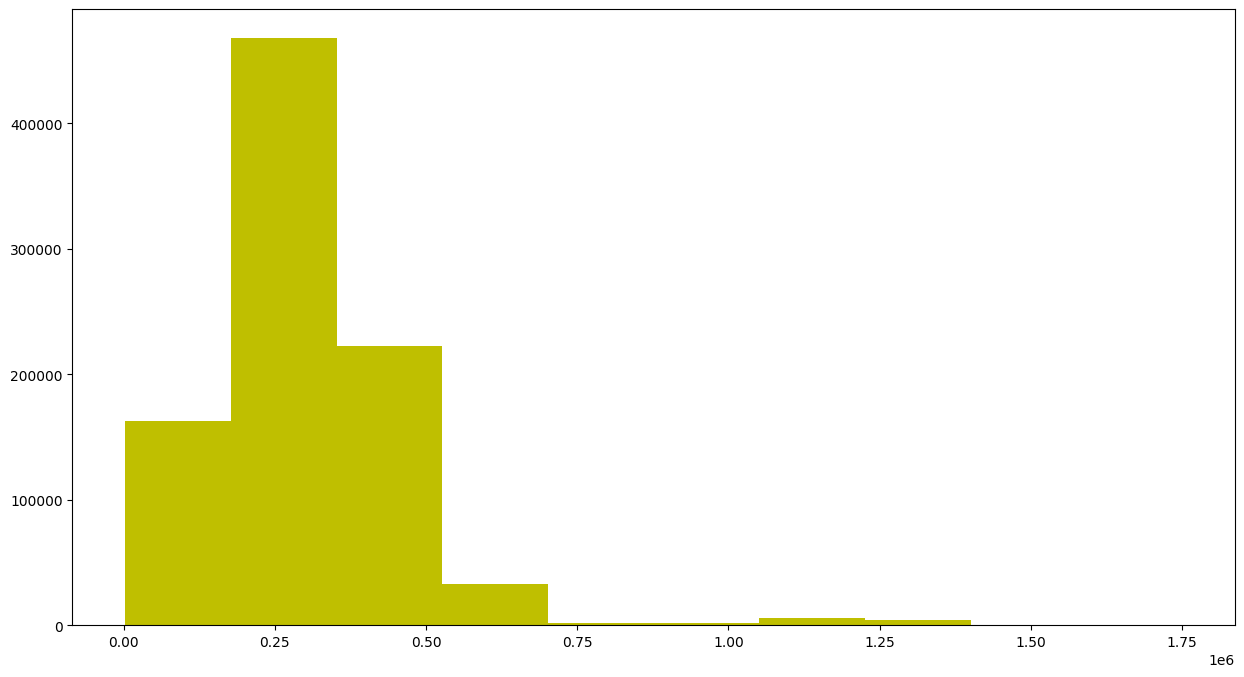

In [39]:
plt.hist(df['Price'], color="y")
plt.show()

# Thống kê số lượng bán được của từng mặt hàng qua các năm, sử dụng biểu đồ dạng bar để thể hiện số liệu đã thống kê.

In [47]:
df_soluong = df.groupby([df['OrderDate'].dt.year, 'ItemCode'])['Quantity'].sum().reset_index()

df_soluong

,OrderDate,ItemCode,Quantity
0,2013,A1K-CU-049-XD-M,1
1,2013,A1T-CU-113-DEN-L,1
2,2013,A1T-CU-117-DEN-L,1
3,2013,A1T-CU-162-XC-M,1
4,2013,A1T-CU-203-XD-M,1
...,...,...,...
64297,2022,VO-VL-1020002-DEN-F,100
64298,2022,VO-VL-1020002-XAM-F,78
64299,2022,VO-VL-1020002-XCD-F,82
64300,2022,VO-VL-1020002-XDE-F,60


In [52]:
for i in df_soluong['OrderDate'].value_counts().sort_index().index:
  print(df_soluong[df_soluong['OrderDate'] == i].shape)

(340, 3)
(587, 3)
(483, 3)
(5752, 3)
(12284, 3)
(12027, 3)
(11220, 3)
(8309, 3)
(6314, 3)
(6986, 3)


# Liệt kê top 3 nhân viên bán được nhiều mặt hàng nhất

In [53]:
df_nhanvien = df.groupby(by=['Employee'])['Quantity'].sum().reset_index()

df_nhanvien

,Employee,Quantity
0,1,1201
1,2,11866
2,3,3329
3,4,4216
4,5,13472
...,...,...
599,TV.012.VTU,163
600,TV.013.LVS,3
601,TV.014.BHO,39
602,TV.015.BHO,131


In [55]:
df_nhanvien.sort_values(by=['Quantity'], ascending=False).head(3)

,Employee,Quantity
14,15,22418
4,5,13472
12,13,13270


# Báo cáo doanh thu của từng shop bán hàng qua các năm theo mẫu bên dưới, sau đó sử dụng biểu đồ dạng bar thể hiện số liệu của bảng báo báo.

In [56]:
df_doanhthu2 = df.groupby(['Shop',df['OrderDate'].dt.year])['Quantity'].agg(sum).reset_index()

df_doanhthu2

,Shop,OrderDate,Quantity
0,CN001,2013,9
1,CN001,2014,7
2,CN001,2018,17589
3,CN001,2019,15468
4,CN001,2020,2533
...,...,...,...
106,CN020,2022,8162
107,CN021,2021,4132
108,CN021,2022,10397
109,CN022,2022,2823


Cửa hàng 1

In [57]:
print(df_doanhthu2['Shop'].unique())

['CN001' 'CN002' 'CN003' 'CN004' 'CN005' 'CN006' 'CN007' 'CN008' 'CN009'
 'CN010' 'CN011' 'CN012' 'CN013' 'CN014' 'CN016' 'CN017' 'CN018' 'CN019'
 'CN020' 'CN021' 'CN022' 'CN023']


In [58]:
df_store_1 = df_doanhthu2[df_doanhthu2['Shop'] == 'CN001']
store_1 = df_store_1.groupby(by=['OrderDate'])['Quantity'].sum()
print(store_1)

OrderDate
2013        9
2014        7
2018    17589
2019    15468
2020     2533
Name: Quantity, dtype: int64
